In [ ]:
#| hide
from nbdev_setup.core import *

# 📒 `nbdev-setup` 
> Instructions to set up nbdev literate programming environment.

#### Official Documentation
Tutorial: https://nbdev.fast.ai/tutorial.html  
Youtube: https://www.youtube.com/watch?v=67FdzLSt4aA (65 mins)

## Instructions

1. Create a **new repo on github** and clone locally


2. **Install nbdev**
  *  `pip install nbdev` 
    * Linux/WSL only (as of Aug 2022)  
    * Note: pip install does work on windows, but some commands (i.e. doc building with `Quarto`) are unix only. 


3. Create 📒 **nbdev project** from current repo  
  * `nbdev_new`  
  * settings.ini should update automatically with github config values.  
 
 
4. Install **git and Jupyter hooks** for git-friendly notebooks  
  * `nbdev_install_hooks`
  * `nbdev_install_quarto` local documents

Use `nbdev_help` for command list

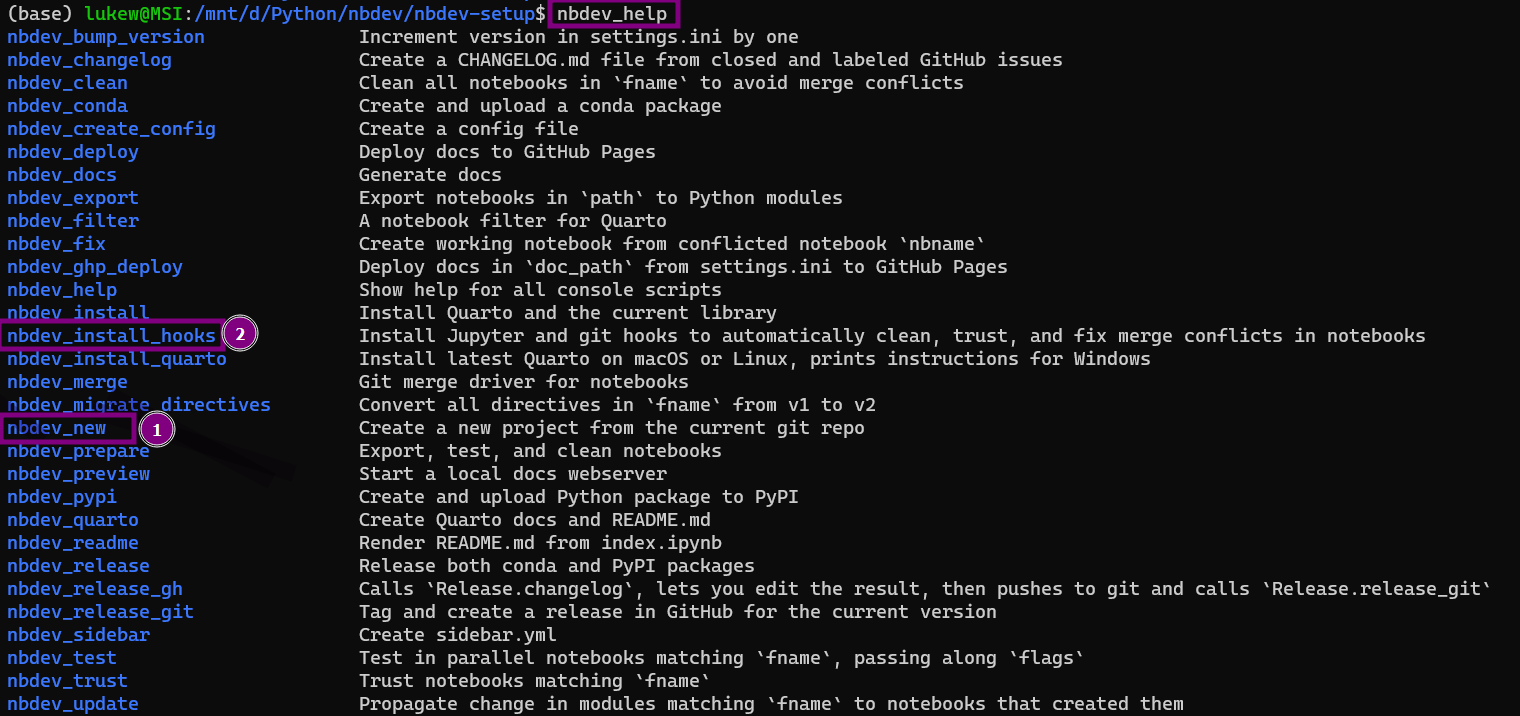

##  Development

Quick access command:  

>`nbdev_prepare`  
>`nbdev_docs`  
>git add -A; git commit -m'check in files'; git push



Run **`jupyter notebook`** and add code using `export` tags

* i.e. 📑 [notebooks/00_core.ipynb]

##  🏗️ `nbdev_prepare` 
command bundles the following

1. 🏗️ nbdev_export: Builds the .py modules and library from the jupyter notebook
2. 🛠️ nbdev_test: Tests all your notebooks
3. 🚿 nbdev_clean: Cleans your notebooks to get rid of extreanous output for Github

📝 To build docs from notebooks (including README.md from `index.ipynb`)  

> nbdev_docs

#### Install module locally using pip:

In [ ]:
!pip install -e .

Obtaining file:///mnt/d/Python/nbdev/nbdev-setup
  Attempting uninstall: nbdev-setup
    Found existing installation: nbdev-setup 0.0.1
    Uninstalling nbdev-setup-0.0.1:
      Successfully uninstalled nbdev-setup-0.0.1
  Running setup.py develop for nbdev-setup


#### To use module inline:

In [ ]:
from nbdev_setup.core import *

In [ ]:
hello_player('Luke')

'Hello Luke! From 00_core.ipynb'

# 🃏 Playing Cards
Found in `00_core.ipynb` which compiles into `nbdev_setup/core.py`

In [ ]:
%load_ext autoreload
%autoreload 2
from nbdev.showdoc import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from nbdev_setup.core import Card, Deck

In [ ]:
show_doc(Deck)

---

### Deck

>      Deck (jokers=True)

A deck of 52 cards, includes jokers by default.

* Source code exported from `00_core.ipynb`
* Located in `core.py`

In [ ]:
import inspect
print(inspect.getsource(Deck))

class Deck:
    "A deck of 54 cards, including two jokers."
    def __init__(self, jokers=True):
        self.cards = [Card(suit=s, rank=r) for s in range(4) for r in range(1,14)]
        if jokers:
            self.cards.append(Card(suit=4, rank=None))
            self.cards.append(Card(suit=4, rank=None))
            
    def __str__(self):
        ret = f"Deck ({len(self.cards)})\n"
        cardlist = "".join([f"{card}; " for card in self.cards])
        return ret + cardlist
    __repr__ = __str__
    
    def __len__(self):
        return len(self.cards)
    
    def shuffle(self):
        random.shuffle(self.cards)
        
    def take_card(self):
        return self.cards.pop()
    
    def draw_n(self, n:int):
        hand = []
        for card in range(n):
            hand.append(self.take_card())
        return hand



# ♤ ♥ ♢ ♧ ♤ ♡ ♢ ♧ 
#### Initialise playing deck:

In [ ]:
deck = Deck(jokers=True)
deck

Deck (54)
2♠; 3♠; 4♠; 5♠; 6♠; 7♠; 8♠; 9♠; 10♠; J♠; Q♠; K♠; A♠; 2♣; 3♣; 4♣; 5♣; 6♣; 7♣; 8♣; 9♣; 10♣; J♣; Q♣; K♣; A♣; 2♦; 3♦; 4♦; 5♦; 6♦; 7♦; 8♦; 9♦; 10♦; J♦; Q♦; K♦; A♦; 2♥; 3♥; 4♥; 5♥; 6♥; 7♥; 8♥; 9♥; 10♥; J♥; Q♥; K♥; A♥; 🃏; 🃏; 

#### Shuffle deck and take a card:

In [ ]:
deck.shuffle()
c = deck.take_card()
c

9♣

#### Draw hands

In [ ]:
deck = Deck()
deck.shuffle()

h1, h2, h3 = deck.draw_n(5), deck.draw_n(5), deck.draw_n(5)

print(h1, h2, h3, sep="\n")

[10♣, 9♣, 5♠, 7♦, A♣]
[5♥, 🃏, 2♦, 6♦, J♠]
[Q♠, K♣, J♣, 2♣, 🃏]
